<a href="https://colab.research.google.com/github/Supreeta11/bike-sharing-demand-prediction/blob/main/Copy_of_Copy_of_supreeta_kumari__Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing Required Libraries**

In [1]:
# Importing the  common libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source

from IPython.display import SVG
from IPython.display import display


from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb



# **Initializing Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path ="/content/drive/MyDrive/SeoulBikeData.csv"
bikes_data=pd.read_csv(file_path,encoding='unicode_escape')


# **Explorartory Data Analysis**

Taking a quick glance of our data

In [4]:
bikes_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# dat description for the info
bikes_data.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


By looking at Rented Bike Count,we get mean is more than median. so there can be outliers.

In [6]:

bikes_data.shape

(8760, 14)

## Changing column names

In [7]:

bikes_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
#rename column
bikes_data = bikes_data.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 
                        'Temperature(°C)': 'Temperature',
                        'Humidity(%)': 'Humidity', 
                        'Wind speed (m/s)': 'Wind_speed', 
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'Dew_point_temperature', 
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                        'Rainfall(mm)': 'Rainfall', 
                        'Snowfall (cm)': 'Snowfall',
                        'Functioning Day': 'Functioning_Day'})

we changed coloum name for ease of reading

## Finding categorical feature 

In [9]:
bikes_data.dtypes

Date                      object
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

In [10]:
print(bikes_data.dtypes.astype(str).value_counts())

float64    6
object     4
int64      4
dtype: int64


In [11]:
# see all the date or diffrent sesaons and holiday and functioning day
print(bikes_data['Seasons'].unique())
print(bikes_data['Holiday'].unique())
print(bikes_data['Functioning_Day'].unique())
print(bikes_data['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


There are 14 columns. 10 are numerical columns and 4 are categorical columns.


## Checking for null values

In [12]:
# data information for null value
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [13]:
# checkng for no null value
bikes_data.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

Dataset has no null values!!

## Extracting Features from date

In [16]:
#extarcting all usefull from date formate
bikes_data['Date']=pd.to_datetime(bikes_data['Date'])
bikes_data['Year'] = pd.DatetimeIndex(bikes_data['Date']).year
bikes_data['Day'] = pd.DatetimeIndex(bikes_data['Date']).day
bikes_data['Month']= pd.DatetimeIndex(bikes_data['Date']).month
bikes_data['weekday']=pd.DatetimeIndex(bikes_data['Date']).weekday

'Date' column have multiple features.Extraction of it can be useful.

In [17]:
# data after date time extraction
bikes_data.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [18]:
display(bikes_data['weekday'].unique())

array([3, 6, 2, 4, 0, 5, 1])

In [19]:
#weekday is in range 0-6, so we need to make it to normal 1-7
bikes_data['weekday'] = np.array(bikes_data['weekday'])+1
display(bikes_data['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

In [20]:
# Rented_bikes_per_year = pd.DataFrame(df['Rented Bikes Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
# Rented_bikes_per_month = pd.DataFrame(df['Rented Bikes Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
# Rented_bikes_per_Day= pd.DataFrame(df['Rented Bikes Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_bikes_per_Weekday= pd.DataFrame(bikes_data['Rented_Bike_Count'].groupby(by=bikes_data['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bikes_per_Weekday

,weekday,Rented_Bike_Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [21]:
# read the data for the year
bikes_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [22]:
# year month count from the data set
bikes_data.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

,Year,Month,Rented_Bike_Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [23]:
bikes_data['Months_string'] = bikes_data['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

In [25]:
import plotly.express as px

In [26]:
#line plot for the month_year group
month_year_group= bikes_data.groupby(by=['Month','Months_string','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented_Bike_Count',x= 'Months_string',color= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=500)

Total Rented Bikes in year 2017 & 2018 on monthly basis

In [27]:
#bar plot for diffrent year
px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


As we can see from above plot,
In 2017 ,Rented bike count was very low.
In 2018,we see sharp increment in rented bike count.
Highest count in rented bike is in june,july & may(2018).

## Checking Distribution of Dependent variable

In [28]:
# histogram  plot for the rented bike and year
px.histogram(bikes_data, x="Rented_Bike_Count",marginal="violin",color='Year')

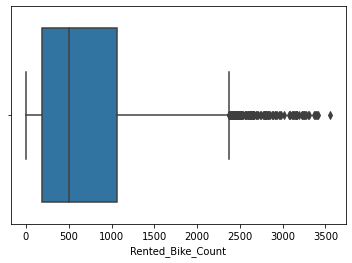

In [29]:
sns.boxplot(x = bikes_data['Rented_Bike_Count'])

In [30]:
#square root transformation
px.histogram(bikes_data, x=np.sqrt(bikes_data["Rented_Bike_Count"]),color='Year',marginal="violin", title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')

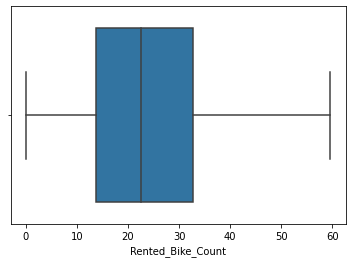

In [31]:
sns.boxplot(x = np.sqrt(bikes_data["Rented_Bike_Count"]))

 Our Model works best when we have normal distribution. Normal distribution for model building as it makes math easier. 

## Exploaring Categorical Variables

In [32]:
bikes_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

counting number of columns in categorical features

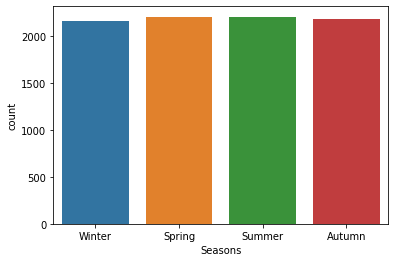

In [33]:
#count plot for diffrent seasons
sns.countplot(x ='Seasons', data = bikes_data)

our dataset contain information regarding all months.


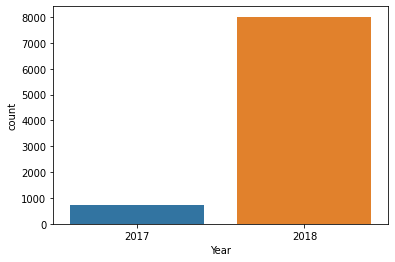

In [34]:
#comment for countplot for year
sns.countplot(x ='Year', data = bikes_data)


datset has more information regarding year 2018

## Finding relation using Bar Plot

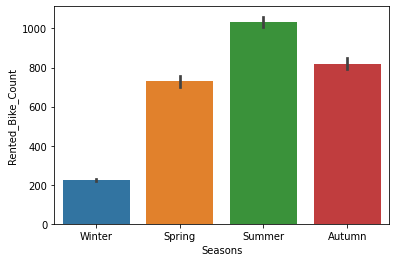

In [35]:
#Finding relation betwwen seasons and rented bike count. telling us rented bike count on that season.
# sns.set_style('darkgrid')
sns.barplot(x ='Seasons', y ='Rented_Bike_Count', data = bikes_data, palette ='tab10')


Rented bikes count is higher in summer & are lesser in winter season

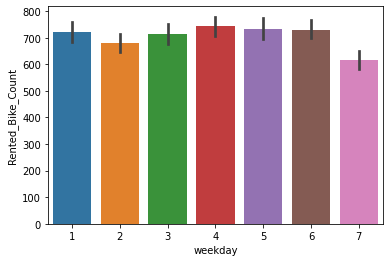

In [37]:
#plot for the rented bike forweekday
sns.barplot(x ='weekday', y ='Rented_Bike_Count', data = bikes_data, palette ='tab10')


In all day ,rented bike count are consistant


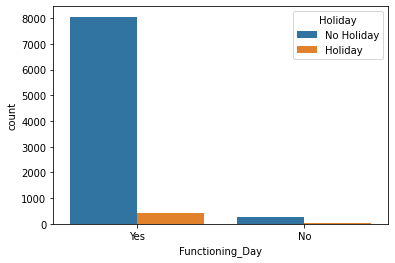

In [38]:
#holiday or not holiday plot
sns.countplot(x ='Functioning_Day',hue = 'Holiday', data = bikes_data)


we got to know all holidays are falling into functional days

## **Exploring Numerical Variables**

In [39]:
bikes_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In [40]:
#selecting numerical features
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall' ]

In [42]:
# List of colors in the color palettes
rgb_values = sns.color_palette("bright")

In [43]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

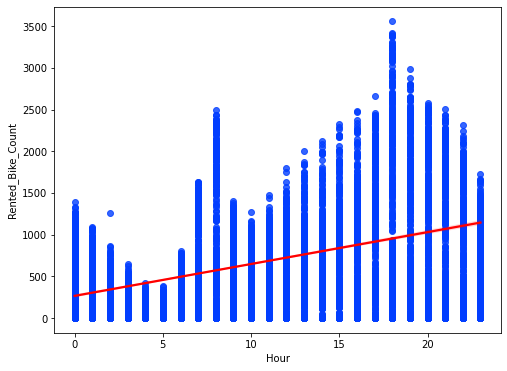

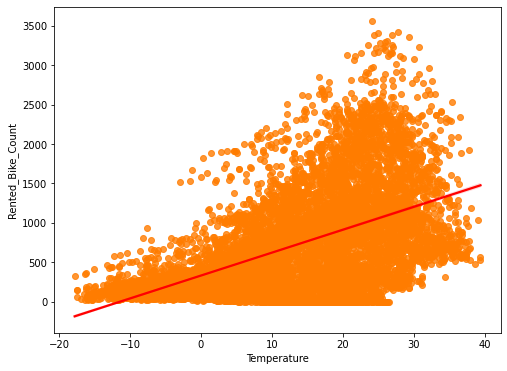

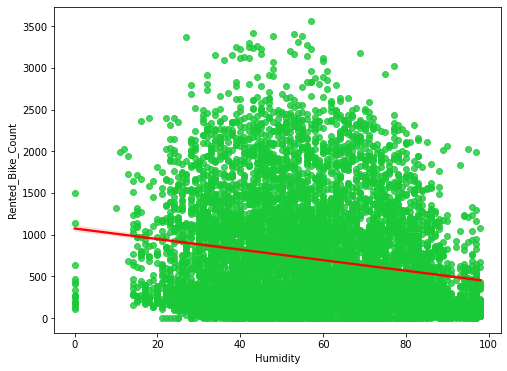

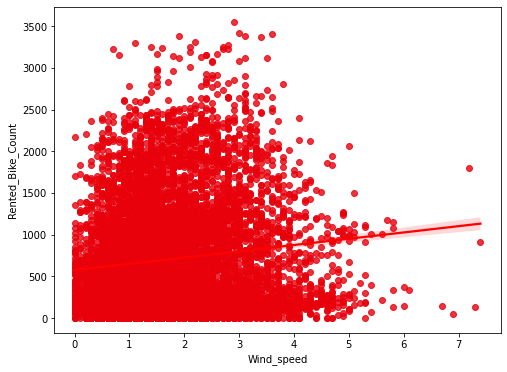

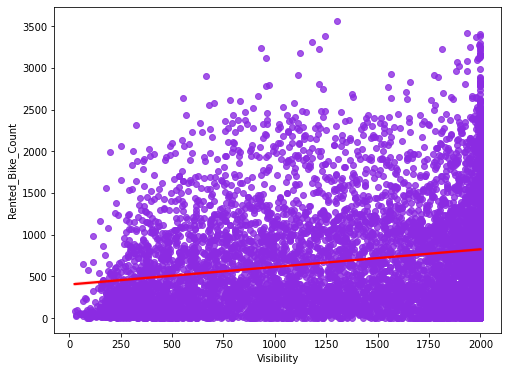

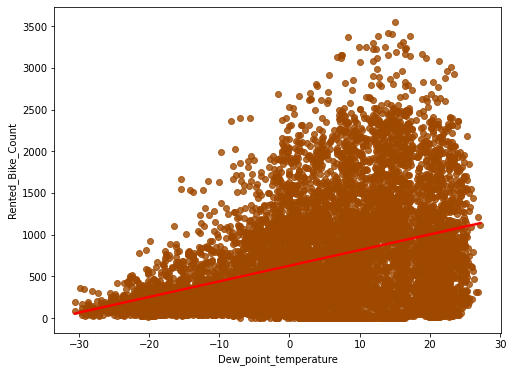

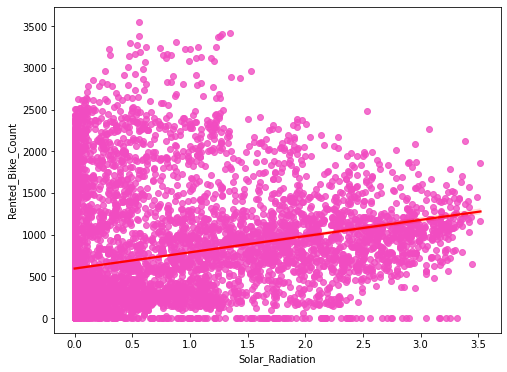

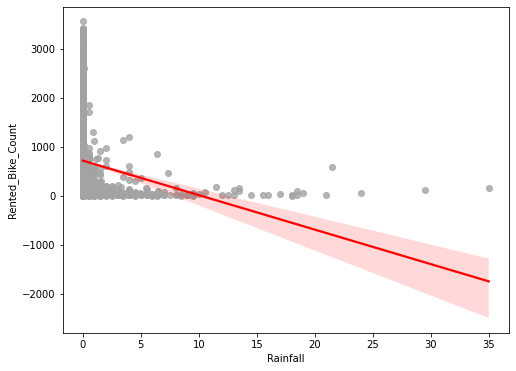

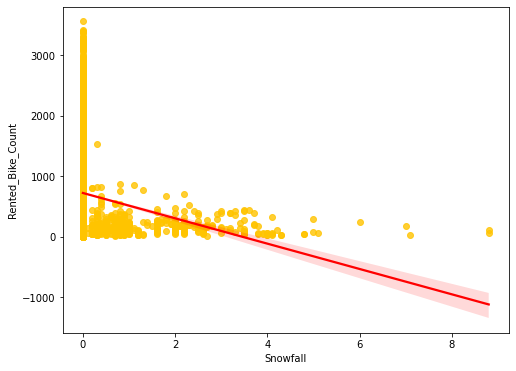

In [44]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bikes_data[col], y = bikes_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

## Effects of numerical feature in Rented bikes count

**Hour**- Demand of bikes is more in morning(7 to 11)& in evening from (4 to 9).
**Temperature**- Rented bike count is more used in temperature range having 20 to 30.
**Humidity**- people prefer bikes when there is less humidity.

**Wind speed**- there is less effect of wind speed in our data.
   
**Visibility**- there is less effect .but we know visibility is positively related to bikes count.

**Snowfall& Rain**- people less prefer bikes in snowfall& rain.




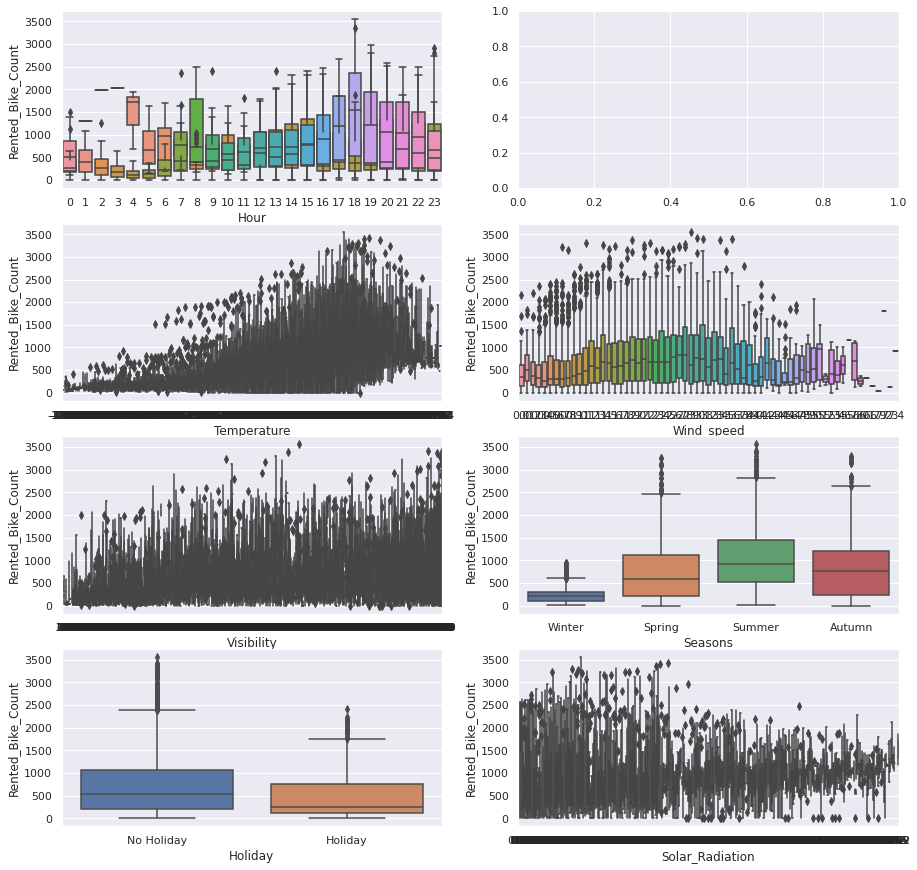

In [46]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])

## Finding correlation of dependent variable with other variable

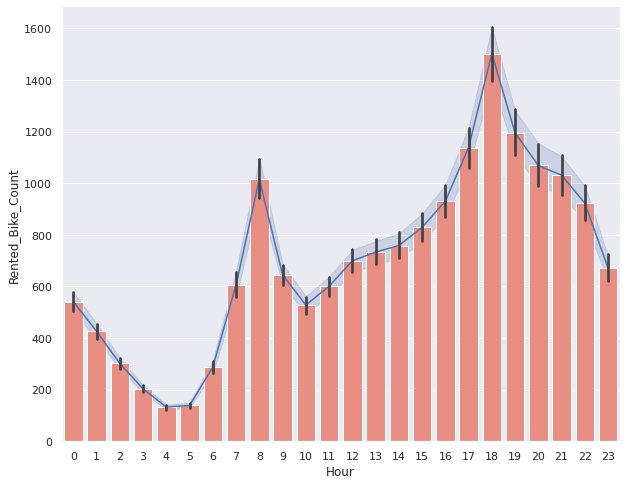

In [48]:
# bar plot between hr and rented bike count
plt.figure(figsize=(10,8))
sns.lineplot(x = bikes_data['Hour'],y = bikes_data['Rented_Bike_Count'])
sns.barplot(x = bikes_data['Hour'],y = bikes_data['Rented_Bike_Count'], color="salmon")


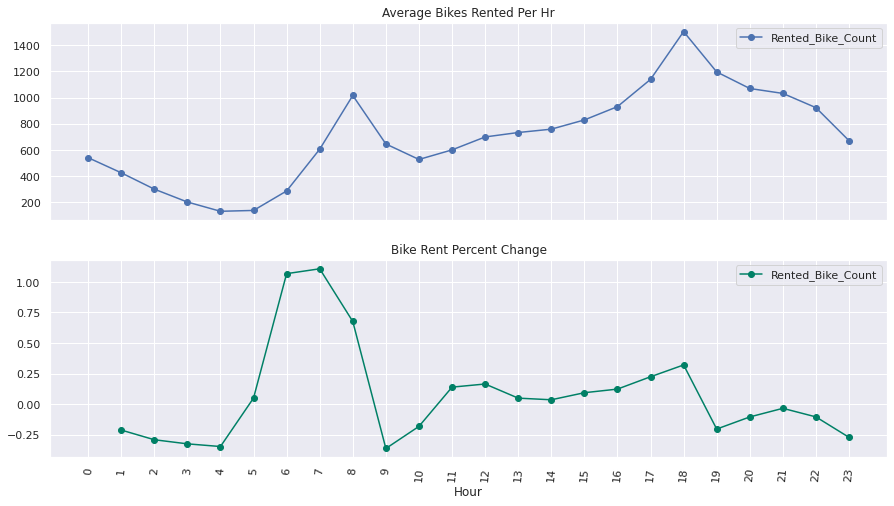

In [49]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bikes_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bikes_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))

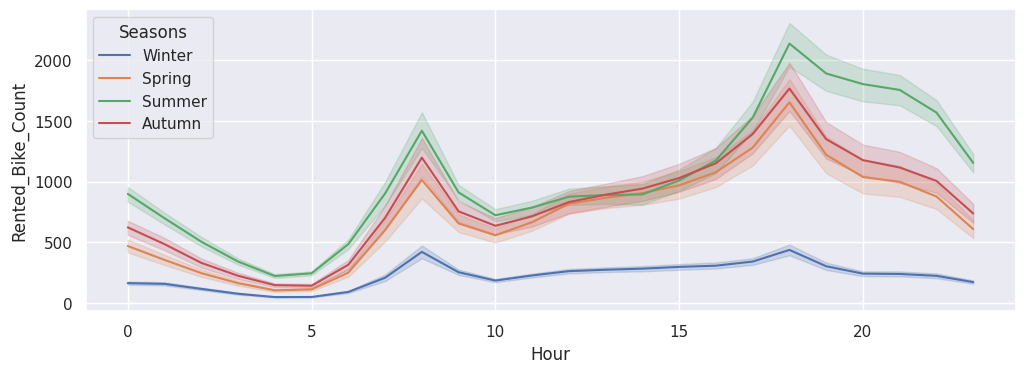

In [50]:
# line plot seasonal varaition
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=bikes_data, x="Hour", y="Rented_Bike_Count", hue="Seasons")

 we can see from here,that customer prefer renting bikes more in summer and least in winter.
 

## Relational Analysis-Finding correlation between different variables.

In [51]:
#correlation data
np.round(bikes_data.corr()['Rented_Bike_Count'],3)

Rented_Bike_Count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Year                     0.215
Day                      0.047
Month                    0.071
weekday                 -0.022
Name: Rented_Bike_Count, dtype: float64

Hour and Temperature are highly correlated with bike count

# Here we are dropping columns that are not required

In [52]:
# dropping the non-perfoming column
bikes_data.drop('Months_string',axis=1,inplace=True)
bikes_data.drop('Date',axis=1,inplace=True)

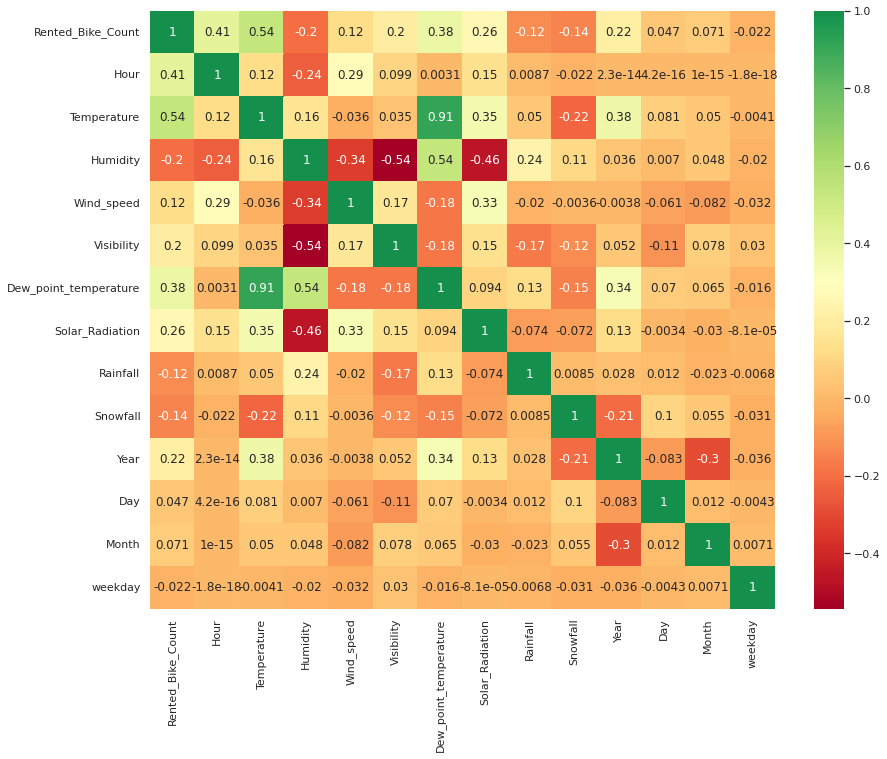

In [53]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = bikes_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bikes_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

Temperature & dew points are highly coorelated .we can add them to make single column.

In [56]:
# creating new  feature
bikes_data['Temperature_and_DP_Temp'] = [bikes_data['Temperature'][i]+bikes_data['Dew_point_temperature'][i] for i in range(len(bikes_data))]
bikes_data.drop(['Temperature','Dew_point_temperature'],axis=1,inplace=True)


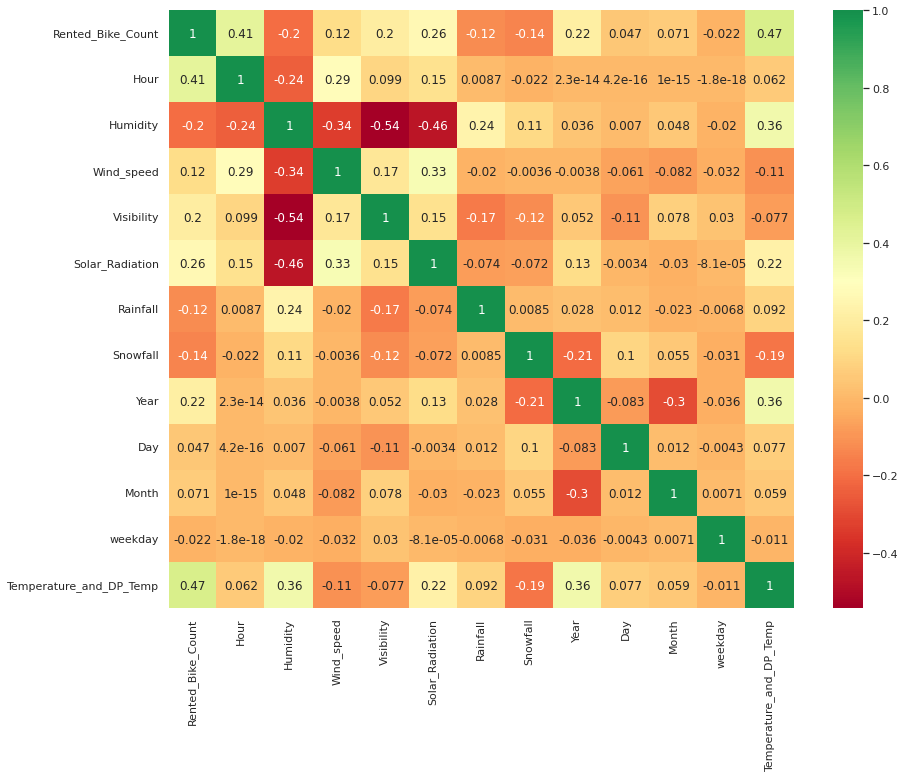

In [57]:
#correlation plot
corrmat = bikes_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bikes_data[top_corr_features].corr(),annot=True,cmap="RdYlGn",center=0.3)

In [58]:
#creating dummies column for the given feature
bikes_data=pd.get_dummies(bikes_data,drop_first=True)


In [59]:
# table after feature engineering
bikes_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,weekday,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,4,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,4,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,4,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,4,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,4,-24.6,0,0,1,1,1


In [60]:
# removing less importance column
bikes_data.drop('weekday',axis=1,inplace=True)

In [61]:
bikes_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,-24.6,0,0,1,1,1


In [62]:
# shape of the data
bikes_data.shape

(8760, 17)

##**Model Building**

In [63]:
# Data for all the independent variables
X = bikes_data.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable

y = np.sqrt(bikes_data['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [64]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [65]:
print(model.feature_importances_)


[0.2638465  0.11810473 0.01368018 0.0287034  0.05780546 0.03765966
 0.00255831 0.00133955 0.01782734 0.01629649 0.06972606 0.01642625
 0.00888823 0.18194059 0.00542879 0.15976845]


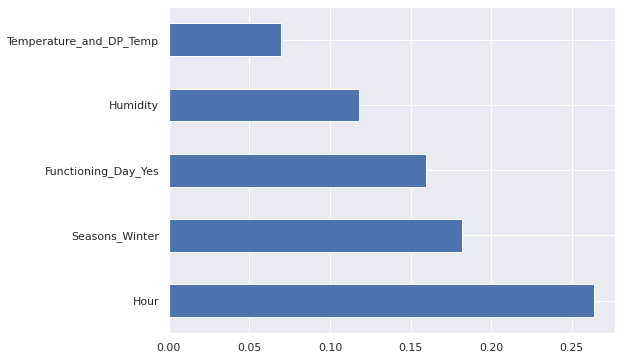

In [66]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Train Test Split Model

In [67]:
#import train-test split lib
from sklearn.model_selection import train_test_split

In [68]:
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [69]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


#Linear Regression Model

For linear regression we have some assumptions, given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied:(rewrite)

* **Linear relationship**: Relationship between response and feature variables should be linear. The linearity assumption can be tested using scatter plots.
* **Little or no multi-collinearity**: It is assumed that there is little or no multicollinearity in the data. Multicollinearity occurs when the features (or independent variables) are not independent from each other.
* **Little or no auto-correlation**: Another assumption is that there is little or no autocorrelation in the data. Autocorrelation occurs when the residual errors are not independent from each other.
* **Homoscedasticity**: Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the independent variables and the dependent variable) is the same across all values of the independent

In [77]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [78]:
# all coeffient
reg.score(X_train, y_train)

0.6547192361864398

In [79]:
#diffresnt coefficient for different features
reg.coef_

array([ 4.87925477e-01, -2.29940503e-01,  1.89672962e-01, -1.56414191e-04,
       -8.02486527e-01, -1.39558289e+00,  1.86527269e-01, -2.64795650e+00,
       -1.86084876e-02, -2.30326900e-02,  2.47906155e-01, -2.89868003e+00,
       -2.84332142e+00, -9.04145095e+00,  2.85999149e+00,  2.84894893e+01])

In [80]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [81]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.95555328513579
RMSE : 7.277056636108846
R2 : 0.6547192361864398
Adjusted R2 : 0.6515350908140958


In [82]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.95555328513579
RMSE : 7.277056636108846
R2 : 0.6547192361864398
Adjusted R2 : 0.6515350908140958


In [83]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.08739505098528
RMSE : 7.42208832142176
R2 : 0.6588467149667645
Adjusted R2 : 0.6557006327993111


In [84]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.08739505098528
RMSE : 7.42208832142176
R2 : 0.6588467149667645
Adjusted R2 : 0.6557006327993111


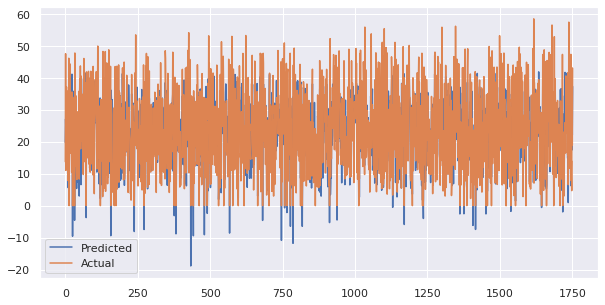

In [85]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

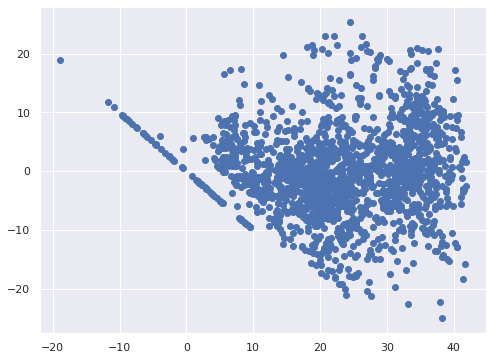

In [86]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

## Implementing Lasso Regression

In [87]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [88]:
# lasso score 
lasso.score(X_train, y_train)

0.6436819185266032

In [89]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [90]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.64834166119503
RMSE : 7.392451667829492
R2 : 0.6436819185266032
Adjusted R2 : 0.6403959880922664


In [91]:
# mterics for lasso regressor flor test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.49564641514416
RMSE : 7.582588371733241
R2 : 0.643932543343507
Adjusted R2 : 0.6406489241466748


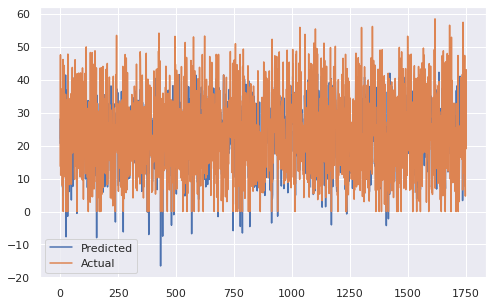

In [92]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

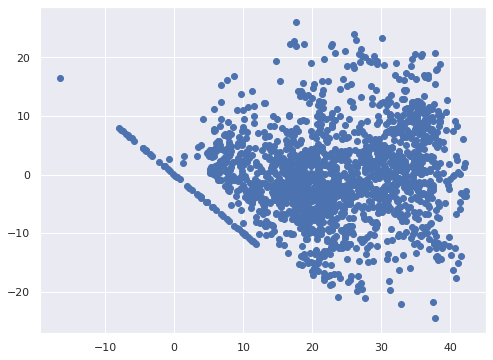

In [93]:
# Heteroscedasticity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

## Implementing Ridge Regresion

In [94]:
#importing ridge regression
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [95]:
# ridge score
ridge.score(X_train, y_train)

0.6547191910419368

In [96]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [97]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.955560208927636
RMSE : 7.277057111836325
R2 : 0.6547191910419368
Adjusted R2 : 0.6515350452532745


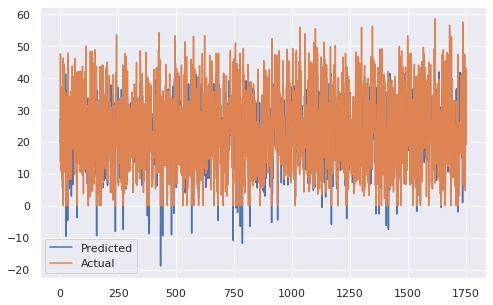

In [98]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

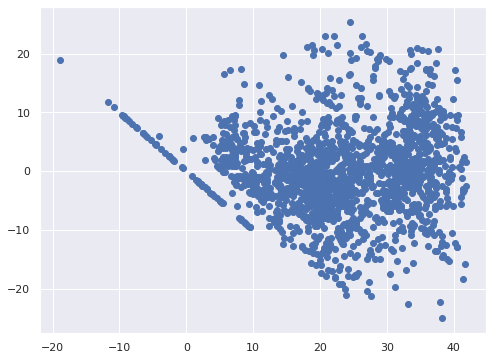

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

## Implementing Elastic Net Regressor

In [ ]:
#importing elasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#a*l1+b*l2
#alpha=a+b and l1 ratio=a/a+b
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
#elastic net score

elasticnet.score(X_train, y_train)

0.5801724303474118

In [ ]:
#y_predict for train and test dataset
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [ ]:
#metrics for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 64.38876290053423
RMSE : 8.024260894346234
R2 : 0.5801724303474118
Adjusted R2 : 0.5763008216359182


In [ ]:
#metrics for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 67.17969621593292
RMSE : 8.196322115188796
R2 : 0.5839597419629589
Adjusted R2 : 0.5801230594680928


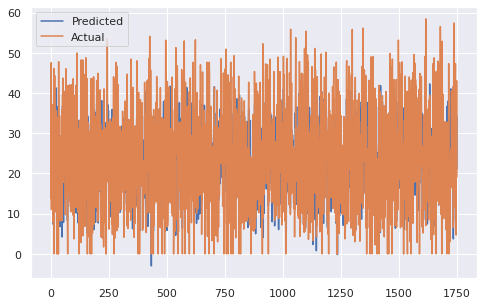

In [ ]:
#plot for pred vs actual for test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

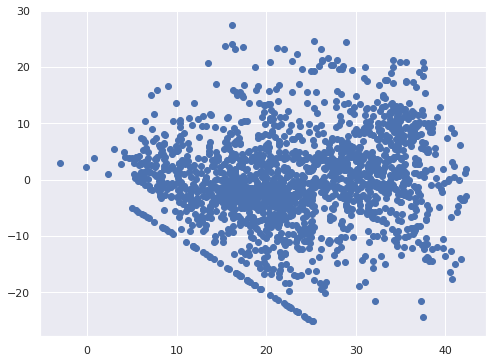

In [ ]:
#Heteroscedasticity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

## Implementing Of Desicion tree by using desicion tree regrssor

In [ ]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [ ]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8379561044681545
MSE : 24.852598359638517
RMSE : 4.985238044430629
R2 : 0.8379561044681545
Adjusted R2 : 0.8364617515410597


In [ ]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 29.680122329204433
RMSE : 5.447946615854861
R2 : 0.8161925931798935
Adjusted R2 : 0.814497539284146


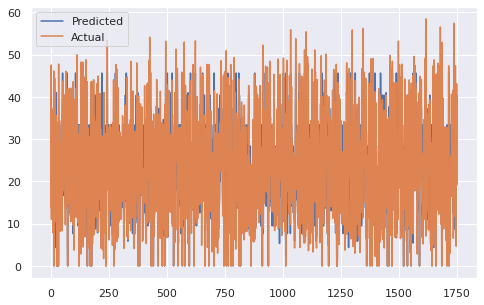

In [ ]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

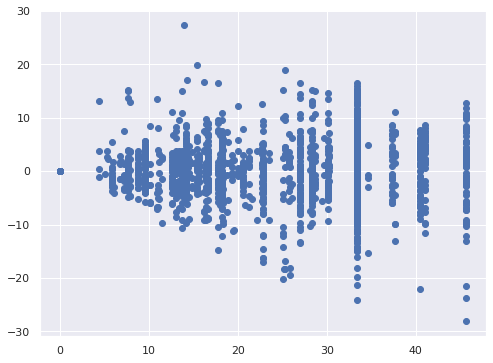

In [ ]:
# Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

## Visualization of Desicion Tree

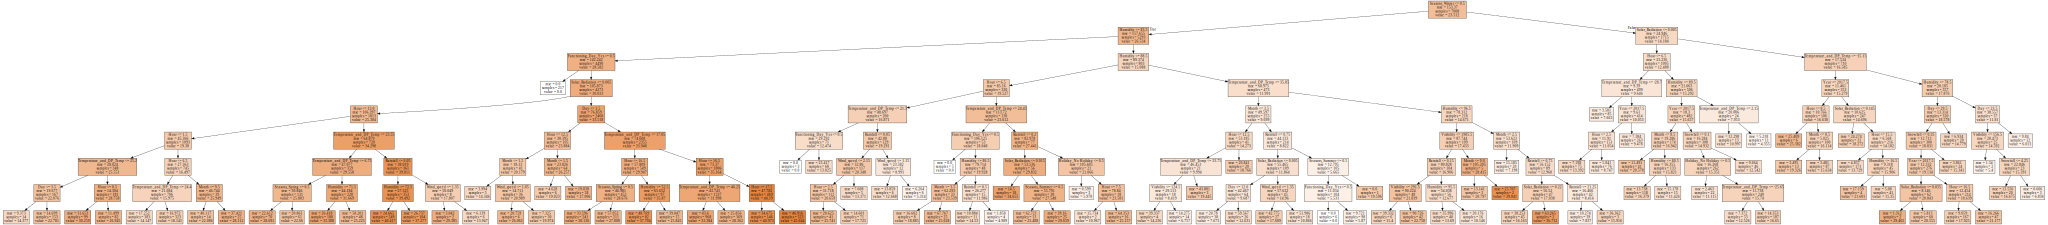

In [ ]:
# decision tree visualization
graph = Source(tree.export_graphviz(decision_regressor, out_file=None
   , feature_names=X_train.columns, class_names=['0', '1'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))